In [1]:
ls

ASI (1).ipynb  ASI-Copy1 (1).ipynb  train.csv
ASI-1-2.ipynb  ASI_exercice.ipynb


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from scipy.stats import norm
data = pd.read_csv('./train.csv')
data= data.drop(data.index[len(data)-1])
print(data.head())

   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   ...     var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266   ...      4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338   ...      7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155   ...      2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250   ...      4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514   ...     -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784

In [3]:
print(data.shape)
data = data.drop(data.index[2])

(199999, 202)


In [4]:
#Creating the list of the variable
data_var = data.drop('target', axis=1)
data_var = data_var.drop('ID_code' , axis=1)
#Creating the dataframe of the target
data_target = data.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_var, data_target, test_size=0.5)

In [5]:
del data

In [6]:
print('The shape of X_train is ' , X_train.shape)
print('The shape of X_test is ' , X_test.shape)

The shape of X_train is  (99999, 200)
The shape of X_test is  (99999, 200)


count    99999.000000
mean         0.100341
std          0.300456
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64


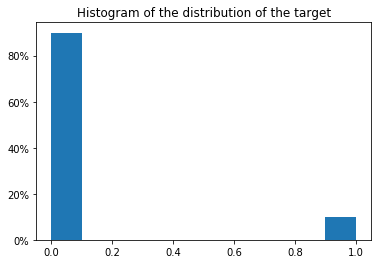

In [7]:
from matplotlib.ticker import PercentFormatter
print(y_train.describe())

plt.title('Histogram of the distribution of the target')
plt.hist(y_train , weights=np.ones(len(y_train)) / len(y_train))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

<h3> Question 3 <h3/>

<h4> Question 3.a <h4/>

In [8]:
##All the function needed to do bayer linear regression from the first lab

#FUNCTION TO COMPUTE SIGMA HAT
def get_sigma2_hat(X, w_hat, t):
    sigma2_hat = (t- X.dot(w_hat.T)).T.dot((t- X.dot(w_hat.T))) / len(X)
    return sigma2_hat


##FUNCTION TO COMPUTE THE VARIANCE W_HAT
def get_cov_w(x, t, order):
    X_=get_X(x,order)
    w_hat=get_w_hat(x,t,order)
    sigma2_hat = (get_sigma2_hat(X_,w_hat,t))
    cov_w_hat = sigma2_hat * np.linalg.inv(((X_.T.dot(X_))) + 10000000 * np.identity(X_.shape[1]))
   
    return cov_w_hat 


##FUNCTION TO COMPUTE X_
def get_X(x, n):
    X_= np.ones((x.shape[0],1))
    for i in range(1,n+1):
        X_ = np.concatenate((X_,x**i) , axis=1)
    return(X_)

##FUNCTION TO COMPUTE W_HAT
def get_w_hat(x_, y, n):
    #Computing X_
    X_=get_X(x_, n)
 
    #Computing W hat
    w_hat = ( np.linalg.inv( (X_.T.dot (X_)) ) ).dot(X_.T).dot(y) 

    return w_hat

def predict(x, t, x_test, K=1):
    X_test= get_X(x_test, K)
    w_hat = lsfit_k(x,t,K)[0] 
    predictions = ((np.transpose(X_test.dot(w_hat.T))))
    return predictions



def get_lin_regr_degre(x, w, n):
    X=get_X(x,n)
    t_pred=((np.transpose(X.dot(w))))
    return (np.array(t_pred) , x)

<h4> Question 3.b <h4/>

To determine the prior parameters for the gaussian prior I assume that the variables are independant so we have a S (the covariance of the gaussian prior) which is diagonale. To choose the best one I did cross validation with different values of S and I obtained good results with 1000000 identity

<h4> Question 3.c <h4/>

In [42]:
def compute_N_transform(X_train , y_train ,X_test ,y_test, order):

    ##Computing the W aand the prediction according to it
    w_samples = (np.matrix(np.random.multivariate_normal( get_w_hat(X_train,y_train,order) ,get_cov_w(X_train,y_train,order))).T) # TO COMPLETE
    t_pred_train = (get_lin_regr_degre(X_train,np.array(w_samples) ,order)[0])
    t_pred_test = (get_lin_regr_degre(X_test,np.array(w_samples) ,order)[0]) 
   
    
    
    #Computing the loss between prediction and data
    return(w_samples , t_pred_train  , t_pred_test)


#print(compute_N_transform(X_train , y_train ,6)[2])

__COMMENTS:__ 

In this part we compute the t_pred in continous variable 

<h4> Question 3.d<h4/>
    
    
    Here is an application of the few things we need to do on our data to be have a better model in term of preprocessing:
        -> data scaling in order to avoid the data to be to high
        -> removing outliers (to make our predictions more robus and not be affected by points that are not really represnetative of the dataset)
        -> deleting nan rows or rows with nan values

In [9]:
from sklearn.preprocessing import scale

X_train = scale(X_train)
X_test = scale (X_test)

<h4> Question 3.e<h4/>

In [43]:
N_list = [1 ,2 ,3 ,6]
result_list =[]
for order in N_list:
    result_list.append(compute_N_transform(X_train , y_train , X_test, y_test, order))
    print('The variance of the posterior weight distribution is ', np.var(compute_N_transform(X_train , y_train , X_test, y_test, order)[0]))
    
    

The variance of the posterior weight distribution is  0.00011850116933280792
The variance of the posterior weight distribution is  0.0007184476211953767
The variance of the posterior weight distribution is  0.00040894837950974423
The variance of the posterior weight distribution is  4.786626379614141e-05


<h4> Question 3.f<h4/>

To discretize or label after I predicted them I decided to put a threshold. If it is superior to the threshold our label will be considered as a 1 and if it is inferior or equal as a 0.

Howver to determine the best threshold wee tried several threshold on the training dataset and choose the one which gives us the best score and use it as a threshold.


In [44]:
def compute_N_transform_discrete(X_train , y_train , X_test , y_test , order , threshold):

    ##Computing the W aand the prediction according to it
  
    w_samples = (np.matrix(np.random.multivariate_normal( get_w_hat(X_train,y_train,order) ,  get_cov_w(X_train,y_train,order) )).T) # TO COMPLETE
    
    
    train_pred = (get_lin_regr_degre(X_train,np.array(w_samples) ,order)[0]) # COMPLETE
    test_pred =  (get_lin_regr_degre(X_test,np.array(w_samples) ,order)[0])

    #Computing the score of our pred according to the threshold
    
    train_pred[train_pred > threshold] = 1
    train_pred[train_pred <= threshold] = 0
    test_pred[test_pred > threshold] = 1
    test_pred[test_pred <= threshold] = 0
    
    
    
    train_score = (abs( train_pred- np.array(y_train) ).sum()/len(y_train) * 100)   
    test_score =  (abs( test_pred - np.array(y_test) ).sum()/len(y_test) * 100)   
    return(w_samples , train_score , test_score , train_pred , test_pred)


#print(compute_N_transform(X_train , y_train ,6)[2])

In [45]:
N_list = [1 ,2 ,3 ,6]
result_list = []
for order in N_list:
    result = compute_N_transform_discrete(X_train , y_train ,X_test, y_test ,  order ,0.5)
    print('FOR ORDER ' , order)
    print('Error on training ' , result[1] , '%' )
    print('Error on test' ,  result[2] , '%' )

FOR ORDER  1
Error on training  9.849098490984911 %
Error on test 9.75309753097531 %
FOR ORDER  2
Error on training  9.06309063090631 %
Error on test 8.984089840898408 %
FOR ORDER  3
Error on training  8.846088460884609 %
Error on test 8.749087490874908 %
FOR ORDER  6
Error on training  8.602086020860208 %
Error on test 8.594085940859408 %


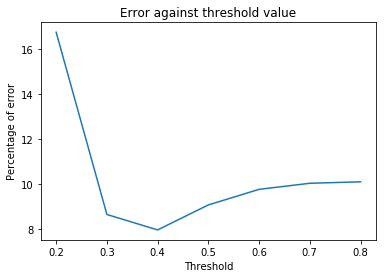

In [46]:
#Finding the best threshold on the train data
threshold_list = [0.2 ,0.3 ,0.4 ,0.5, 0.6 ,0.7 ,0.8]
result_list = []
for threshold in threshold_list:
    result = compute_N_transform_discrete(X_train , y_train ,X_test, y_test ,  2 ,threshold)
    result_list.append(result[1])
    
plt.xlabel('Threshold')
plt.ylabel('Percentage of error')
plt.title('Error against threshold value')
plt.plot(threshold_list , result_list)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, 
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax




Confusion matrix, without normalization
[[89243   762]
 [ 7195  2799]]


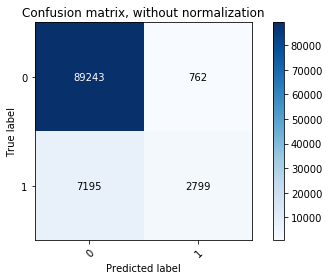

In [52]:
np.set_printoptions(precision=2)

result = compute_N_transform_discrete(X_train , y_train ,X_test, y_test ,  2 ,0.4)
# Plot non-normalized confusion matrix
plot_confusion_matrix(np.array(y_test).reshape((len(y_test),1)), result[4].reshape((len(y_test),1)), 
                      title='Confusion matrix, without normalization')


plt.show()



<h4> Question 3.g<h4/>

[1 0 1 ... 1 1 1]
Confusion matrix, without normalization
[[45257 44748]
 [ 5018  4976]]


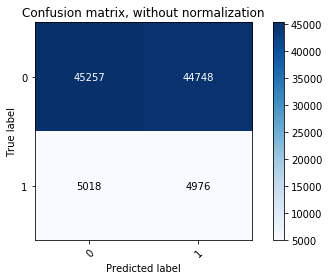

In [53]:
##Generate a random vector to ilustrate the effect of a random classfier
y_pred_random = np.random.randint(2, size=len(y_test))
print(y_pred_random)

##plot the confusion matrix
plot_confusion_matrix(np.array(y_test).reshape((99999,1)), y_pred_random.reshape((99999,1)), 
                      title='Confusion matrix, without normalization')

__COMMENTS:__

So as we can see our classifier manage well to predict 0 but not very well to predict 1. In the case of disease detection this can be really bad because, it is worse to not predict than predicting a disease that is not present.
Furthermore, our model is quite fast to train but if we increase the order it is more computionally demanding>
However our model is better than the random one. 

<h3> Question 4 
 <h3/>

<h4> Question 4.a<h4/>

To do the gradient descent we have to compute the gradient  of the joint likehood. This will allows to obtain the maixmun of the MAP estimator

$ log(g(w,X,t, \sigma^2))= -{D\over 2} log(2\pi)  -{1\over 2\sigma^2}w^Tw + \sum_{n=1}^N (t_n.log(h(w^Tx_n)+(1-t_n)[1-h(w^Tx_n)]) $

So if we derive

$ { \partial log(g)  \over \partial w_i } = - {w_i \over \sigma^2 } +  \sum_{n=0}^{n=N} x_n^{(i)} (t_n - { 1  \over {1 + exp(-w^T x_n)}}) $  

In [10]:
import numpy.random as rd
from sklearn.metrics import f1_score

In [11]:
#Definition of sigmoix in order to avoid rewrittting it
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#COmpute the joint likelihood of the gradient
def gradient_joint_likelihood(X, w, t , sigma2):
    tmp = np.dot((np.array(t).reshape(99999 , 1)) -  sigmoid(np.dot(X, w.T)).T,X)
    return ((-w/sigma2) + tmp)











<h4> Question 4.b<h4/>

In [12]:
##SOME USEFULL FUNCTION TO USE IN THE GRADIENT

#Computing the absolute loss between prediction and data
def loss(y_test, y_pred):
    return(np.sum(abs(y_test-y_pred))/len(y_pred))

#Predicting y according to the data and the W found
def pred(W,X):
    tmp=np.exp(-W.dot(X.T))
    size = tmp.shape[0]
    tmp=tmp.reshape(size)
    prediction = 1/(1+tmp)
    return np.array(prediction)

In [14]:
#FUNCTION THAT COMPUTES THE GRADIENT DESCENT W.R.T X TRAIN AND Y TRAIN
def gradient_descent(X,W,y_train, learning_rate,max_iteration, stop_condition , sigma2):
    
    #Fixing and initiliasing some variables in order to enter in the while condition 
    delta = 10
    previous_loss = 100000
    i = 0
    
    #For each iteration go in the direction of the gradient to increase the joint likelihood
    #and checking if the absolute loss is decreasing enough
    while(i<max_iteration and  delta > stop_condition):
        W += learning_rate*gradient_joint_likelihood(X,W , y_train , sigma2) 
        
        delta = abs(previous_loss-loss(y_train, pred(X,W)))
        previous_loss = loss(y_train, pred(X,W))
        i+=1
        if(i%50 == 0):
            print(previous_loss)
    return W



In [68]:
from sklearn.model_selection import ParameterGrid

hyperparameters = {'learning_rate': [0.01, 0.001 , 0.0001, 0.00001 , 0.000001 , 0.0000001], 'sigma2': [10, 100 , 1000 , 100000]} 

# Compute all combinations
parameter_grid = list(ParameterGrid(hyperparameters))
for parameter_combination in parameter_grid:
    print('Training for parameters ' , parameter_combination)
    W_final = gradient_descent(get_X(X_train,1),rd.rand(1,201), y_train ,parameter_combination.get('learning_rate') , 300, 0.0000001 , parameter_combination.get('sigma2'))

Training for parameters  {'sigma2': 10, 'learning_rate': 0.01}


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.1380413455831685
0.1010410104101041
0.11818172182674082
0.09891012075521538
0.1010410106051722
0.11483215186948503
Training for parameters  {'sigma2': 100, 'learning_rate': 0.01}
0.12236483649643758
0.10369233605643113
0.09245279001556425
0.1010410104101041
0.19890440084811362
0.245421363545138
Training for parameters  {'sigma2': 1000, 'learning_rate': 0.01}
0.11762696144558313
0.11456915098961783
0.10457077130006134
0.1010410104101041
0.22956858650403425
0.20253589348387158
Training for parameters  {'sigma2': 100000, 'learning_rate': 0.01}
0.0876953639491247
0.1796413409516988
0.10404505086649153
0.10104101041010412
0.09628754865168594
0.11601249110565692
Training for parameters  {'sigma2': 10, 'learning_rate': 0.001}
0.19141491561173368
0.09610762439695504
0.09841628191556127
0.08880988117886342
0.17666818464192624
0.0910267348049887
Training for parameters  {'sigma2': 100, 'learning_rate': 0.001}
0.1010317068815983
0.10134454287861404
0.1345440974245836
0.19963788547697084
0.13718

In [73]:
W_final = gradient_descent(get_X(X_train,1),rd.rand(1,201), y_train ,0.000001 , 10000, 0.0000001 , 10000)
predictions =pred(get_X(X_test,1),W_final)
  
#if p>0.5 assign to 1 
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0

0.4056015103275164
0.298553319946752
0.21314547155548738
0.16538688177411576
0.14337314733542875
0.13346793105573448
0.1289490826315166
0.12696151556089233
0.12621956493868852


<h4> Question 4.c<h4/>

We had to do several tries to obtain the global optiumum because our likelihood is not perfectly convexe so to obtain a good solution 

<h4> Question 4.d<h4/>

f1 score on test data is  0.6792216201678325

Confusion matrix, without normalization
[[88397  1608]
 [ 7047  2947]]


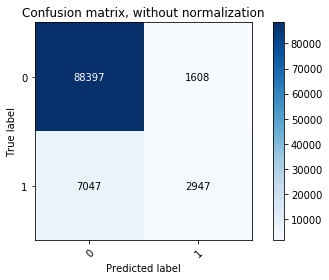

In [74]:
print('f1 score on test data is ' ,  f1_score(y_test , predictions, average='macro'))
print()
#plot the confusion matrix
plot_confusion_matrix(np.array(y_test).reshape((99999,1)), predictions.reshape((99999,1)), 
                      title='Confusion matrix, without normalization')

We have a bit the same result as before (with order 2) but it takes a bit more time to compute. However, we have twice more predicted label 1 which are 0 as true label (1608 against 762) but the same false negative.

So it is bit less good than the Bayesan regression regarding to this criterias

<h4> Question 4.e<h4/>

To use the Laplace approximation we have to compute $ \mu $ which is $ \hat{w} $ computed in the question before with the gradient descent. Then we have to compute $\Sigma$  where :

$ \hat{w} = argmax  (log(g))$


$\Sigma^{-1} = -  { \partial log(g)  \over \partial w \partial w^T } $

$\Sigma^{-1} = {\delta_{i,j} \over {\sigma^2} }  - \sum_{n=0}^{n=N} x_n^{(i)} x_n^{(j)}  { exp(-w^T x_n)  \over ({1 + exp(-w^T x_n)})^2} $

Once we have $\Sigma $ and $\hat{w} $ we can generate the $ \mathcal{N} (\hat{w} ,\Sigma_{|\hat{w}} ) $ which will give us the weights

Then to predict as we can't compute the probability directly but we can draw S samples $ w_1 , ... , w_S $ to predict it

$ \mathbb{E}( \mathbb{P} (T_{new} | x_{new} , w ) ) \approx  { 1  \over S }\sum_{s=1} ^{S} { 1  \over {1 + exp(-w_s^T x_{new})}}  $


<h3> Question 5 
 <h3/>

In [ ]:
def Sigma_1(X,W,sigma2):
    S=np.ones((201,201))
    A=np.exp(-0.5*W.dot(X.T)).A*sigmoid(np.dot(X, W.T)).A.T
    X_inter = A.dot(X)
    S=-X_inter.T.dot(X_inter)
    S=np.array(S)
    for i in range (201): 
        S[i][i]+=1/sigma2
    return S

Sigma=Sig(X_log, W_hat, 1000)

In [ ]:
S=1000
Proba=0
X_test_l=get_X(X_test,1)
for i in range(S):
    W_laplace=np.matrix(np.random.multivariate_normal(W_hat[0], np.linalg.inv(Sigma))).T
    predictions=sigmoid(np.dot(X_test_l, W_laplace))
    Proba+=(1/S)*predictions
Proba=Proba.round()
print(f1_score(y_test,predictions, average="macro"))